In [3]:
!pip install konlpy
!pip install pyLDAvis
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00


In [5]:
vegan_news = pd.read_excel('/content/drive/MyDrive/코딩 공부 폴더/관광데이터 분석 공모전/비건사회문화지역_20140723-20240722.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


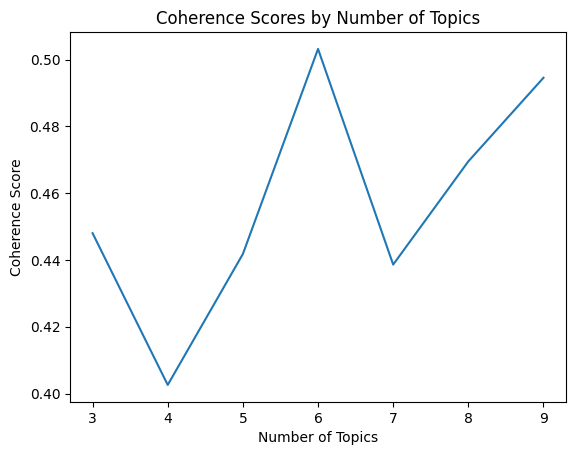

In [9]:
import pandas as pd
from gensim import corpora, models
import gensim
from konlpy.tag import Okt
import re
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

okt = Okt()

excluded_keywords = []

# 토큰화된 문서 리스트 생성, 특정 키워드 제외
tokenized_docs = [[word for word in okt.nouns(doc) if word not in excluded_keywords] for doc in vegan_news['본문']]

# 문서-단어 행렬 생성
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]



coherence_values = []
for num_topics in range(5, 12):
    # 모델 학습
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=100)
    # LDA모델 시각화
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, f'lda_{num_topics}_topics.html')  # HTML 파일로 저장
    #응집성 점수 계산
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

# 응집성 점수 시각화
plt.plot(range(3, 10), coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores by Number of Topics')
plt.show()

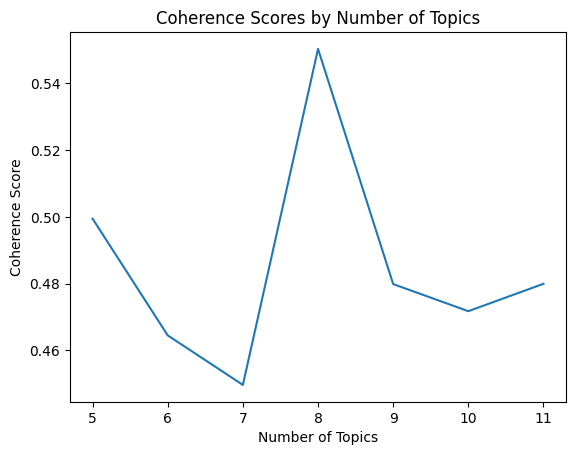

In [17]:
okt = Okt()

# 필터링할 단어 리스트 (여기에 추가로 제외할 단어를 추가할 수 있습니다)
excluded_keywords = []

# 한 글자 단어를 필터링하는 함수
def filter_one_char_words(words):
    return [word for word in words if len(word) > 1]

# 토큰화된 문서 리스트 생성, 특정 키워드 제외 및 한 글자 단어 필터링
tokenized_docs = [
    filter_one_char_words([word for word in okt.nouns(doc) if word not in excluded_keywords])
    for doc in vegan_news['본문']
]

# 문서-단어 행렬 생성
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

coherence_values = []
for num_topics in range(5, 12):
    # 모델 학습
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=100)

    # LDA 모델 시각화
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(vis, f'lda_{num_topics}_topics.html')  # HTML 파일로 저장

    # 응집성 점수 계산
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

# 응집성 점수 시각화
plt.plot(range(5, 12), coherence_values)  # x축 범위를 모델 학습에서 사용한 주제 수 범위와 맞춥니다.
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores by Number of Topics')
plt.show()

In [18]:
optimal_num_topics = 8
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15, random_state=100)

# LDA모델 시각화 저장
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, f'lda_{optimal_num_topics}_topics.html')

In [19]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook() # added
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.267673  0.031704       1        1  13.337776
1     -0.135825 -0.193690       2        1  16.343565
2      0.017685 -0.158236       3        1  18.036664
3      0.089768 -0.014178       4        1  17.276788
4      0.177736  0.007138       5        1  12.528329
5      0.152780  0.146185       6        1   6.428712
6      0.081511 -0.082795       7        1   7.726531
7     -0.115983  0.263872       8        1   8.321635, topic_info=      Term         Freq        Total Category  logprob  loglift
146     채식  2639.000000  2639.000000  Default  30.0000  30.0000
175     서울  2476.000000  2476.000000  Default  29.0000  29.0000
47      비건  5524.000000  5524.000000  Default  28.0000  28.0000
107    브랜드  1371.000000  1371.000000  Default  27.0000  27.0000
12013  외교부   726.000000   726.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
262     한국   275.301072  1261.528663   Topic8  -4.5705   0.9641
6       동물   207.995906   812.130692   Topic8  -4.8509   1.1242
15      세계   192.018022   946.021283   Topic8  -4.9308   0.8916
655     지향   130.770938   276.801836   Topic8  -5.3150   1.7365
91      지구   126.125606   580.166935   Topic8  -5.3511   0.9603

[521 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1214      7  0.989500   가루
4075      8  0.983215   가방
197       3  0.104386   가장
197       4  0.294177   가장
197       5  0.385910   가장
...     ...       ...  ...
571       2  0.162270   회원
571       7  0.054090   회원
571       8  0.781298   회원
2077      1  0.995914   회의
8370      1  0.994229  휴게소

[986 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8])

In [20]:
from google.colab import files

# 파일 다운로드
files.download('lda_8_topics.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
lda_model.save('/content/drive/MyDrive/코딩 공부 폴더/관광데이터 분석 공모전/lda_model.pkl')